In [9]:
import pandas as pd

We could also have called this topic "v-lookups" because they are used in Excel to "join" separate tables.  [The data Carpentry Site has a good introduction to different ways to join](https://datacarpentry.org/python-socialsci/11-joins/index.html).  I encourage you to start there.  Note that I have added the two files you need to the `data/carpentry/` directory so you have them ready to go.

The data set we have that is "normalised" and needs joining is the afl data.  Each player has one row in the players file, each game has a line in the games file, and each player/game combination is in the stats page.  If we want information from the players or games files to be "joined" with the data in the stats file, we need to link them with id columns

Note: even though the concept is "joining" and there is a pandas method `join` that does very similar things, it is a restricted version of the `merge` method, so we will concentrate just on that one.  `merge` is an advanced `join`.

In [10]:
stats = pd.read_csv("data/afl/stats.csv")
games = pd.read_csv("data/afl/games.csv")
players = pd.read_csv("data/afl/players.csv")
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89470 entries, 0 to 89469
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gameId                   89470 non-null  object
 1   team                     89470 non-null  object
 2   year                     89470 non-null  int64 
 3   round                    89470 non-null  object
 4   playerId                 89470 non-null  int64 
 5   displayName              89470 non-null  object
 6   gameNumber               89470 non-null  int64 
 7   Disposals                89470 non-null  int64 
 8   Kicks                    89470 non-null  int64 
 9   Marks                    89470 non-null  int64 
 10  Handballs                89470 non-null  int64 
 11  Goals                    89470 non-null  int64 
 12  Behinds                  89470 non-null  int64 
 13  Hit Outs                 89470 non-null  int64 
 14  Tackles                  89470 non-nul

Imagine I want to know which grounds have hosted the most "bags".  A "bag" of goals is when one player kicks a lot of goals in one game.  Each fan has their own definition of a "bag", lets go with 6 goals or more.

In [11]:
bags = stats["Goals"] >= 6
stats[bags]

,gameId,team,year,round,playerId,displayName,gameNumber,Disposals,Kicks,Marks,...,Brownlow Votes,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Played,Subs
45,2021R203,Adelaide,2021,R2,2009877055,"Walker, Taylor",205,15,13,6,...,1,10,6,1,3,2,0,1,84,-
68,2021R303,Adelaide,2021,R3,2009877055,"Walker, Taylor",206,24,15,9,...,3,10,13,4,4,1,0,1,92,-
971,2021R2205,Brisbane Lions,2021,R22,2014678070,"Cameron, Charlie",148,12,10,6,...,1,5,8,1,3,1,2,0,87,-
1115,2021R307,Carlton,2021,R3,2017779237,"McKay, Harry",51,17,14,10,...,3,7,9,2,9,2,0,0,91,-
1185,2021R604,Carlton,2021,R6,2017779237,"McKay, Harry",54,15,12,9,...,1,6,9,2,5,2,0,0,89,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87157,2012R1001,Richmond,2012,R10,2007822538,"Riewoldt, Jack",100,20,15,9,...,3,11,10,4,8,1,2,1,96,-
87422,2012R2308,Richmond,2012,R23,2007822538,"Riewoldt, Jack",112,11,10,7,...,1,5,5,2,6,0,0,1,100,-
87660,2012R1103,St Kilda,2012,R11,2001823842,"Riewoldt, Nick",230,21,16,8,...,3,9,11,3,5,0,0,0,88,-
88211,2012R1504,Sydney,2012,R15,2010829216,"Reid, Sam",38,11,9,6,...,2,8,3,3,4,2,0,0,92,-


So there are 213 bags, but which grounds hosted them, that is in another file which we need to "join" in.

Notice that, because the stats page includes a copy of the player name, I don't need to join to find out which players have bags.

In [12]:
stats[bags].groupby("displayName")["Goals"].count()

displayName
Ballantyne, Hayden    1
Bennell, Harley       1
Betts, Eddie          6
Breust, Luke          3
Brown, Ben            6
                     ..
Waite, Jarrad         3
Walker, Taylor        6
Walters, Michael      2
Wright, Peter         1
de Goey, Jordan       2
Name: Goals, Length: 75, dtype: int64

<AxesSubplot:xlabel='displayName'>

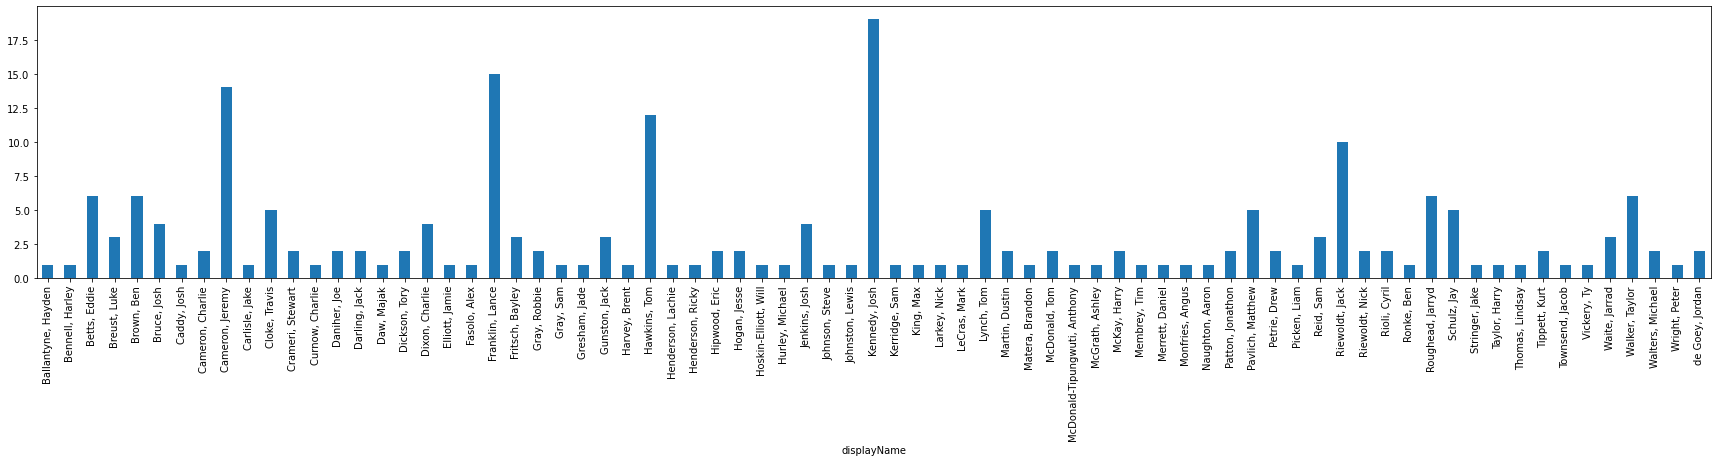

In [13]:
stats[bags].groupby("displayName")["Goals"].count().plot(kind="bar", rot=90, figsize=(30,5))

In [20]:
bag_grounds = stats[bags].merge(how="left", left_on="gameId", right=games, right_on="gameId")
bag_grounds.groupby("venue")["Goals"].count()

venue
Adelaide Oval        18
Bellerive Oval        4
Carrara              14
Cazaly's Stadium      1
Docklands            51
Football Park         5
Gabba                 9
Kardinia Park         9
M.C.G.               35
Manuka Oval           5
Perth Stadium        11
S.C.G.               12
Stadium Australia     1
Subiaco              20
Sydney Showground    13
York Park             5
Name: Goals, dtype: int64

What is going on at docklands?

In [15]:
bag_grounds[bag_grounds["venue"] == "Docklands"][["displayName", "Goals"]]

,displayName,Goals
3,"McKay, Harry",7
4,"McKay, Harry",6
5,"de Goey, Jordan",6
7,"Wright, Peter",7
13,"Larkey, Nick",7
17,"Franklin, Lance",6
18,"Bruce, Josh",10
22,"Bruce, Josh",6
28,"Curnow, Charlie",7
36,"Roughead, Jarryd",6


# Exercise - Ruckman kicks a bag?

Can you find any players who played as a "Ruck" (you will find this in the "position" column of the `players` file) and who kicked a bag?

# Exercise - Advanced, really getting specific

Matt's favourite type of player is the awkward ruckman who takes contested marks.  The sight of a lanky big man rising over the pack and plucking the ball from the air is a thing of great beauty!  The stats don't include an "awkward" column, but if I tell you the following ruckmen were/are _not_ awkward, can you tell who my favourite ever player is from the stats?

In [17]:
not_awkward = ["Lobb, Rory", "Gawn, Max", "Naitanui, Nic"]